Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












##General setup and imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

In [0]:
plt.style.use('fast')

In [9]:
plt.style.available

['tableau-colorblind10',
 'seaborn-muted',
 'seaborn',
 'dark_background',
 'grayscale',
 'seaborn-paper',
 'seaborn-ticks',
 'classic',
 'seaborn-white',
 'seaborn-bright',
 '_classic_test',
 'seaborn-pastel',
 'seaborn-poster',
 'bmh',
 'seaborn-darkgrid',
 'seaborn-notebook',
 'seaborn-dark',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'seaborn-deep',
 'Solarize_Light2',
 'fast',
 'seaborn-colorblind',
 'seaborn-talk',
 'ggplot',
 'seaborn-whitegrid']

#Pandas built-in visualizations

###Continuous vs categorical variables

In [10]:
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'

df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


Remap 'Pclass' to a categorical feature 'cabin_class'

In [11]:
df['cabin_class'] = df['Pclass'].map({1: 'first', 2: 'second', 3: 'third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


Examine the continous 'Fare' feature

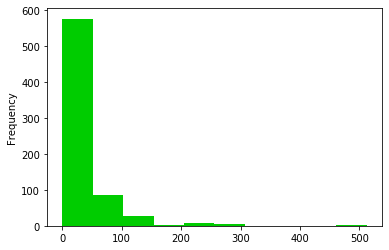

In [12]:
df['Fare'].plot(kind='hist', color='#00cc00');

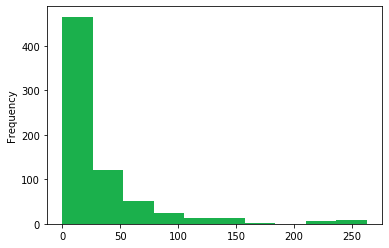

In [13]:
# After removing outliers...
df = df[df['Fare'] < 500]
df['Fare'].plot(kind='hist', color='#1bb04c');

Remap the continuous feature 'Fare' to a categorical feature 'fare_groups'

In [14]:
farebins = [0, 8, 15, 33, 512]
farelabel = ['low', 'medium', 'high', 'vhigh']
df['fare_groups'] = pd.cut(df['Fare'], bins=farebins, labels=farelabel)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class,fare_groups
0,0,3,male,22.0,7.2500,Southampton,third,low
1,1,1,female,38.0,71.2833,Cherbourg,first,vhigh
2,1,3,female,26.0,7.9250,Southampton,third,low
3,1,1,female,35.0,53.1000,Southampton,first,vhigh
4,0,3,male,35.0,8.0500,Southampton,third,medium


Plot how many instances fall into each fare group

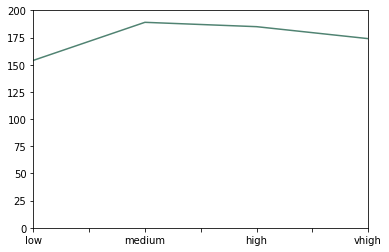

In [15]:
df['fare_groups'].value_counts().sort_index().plot(ylim=(0,200), color='#508372');

Investigate a single continuous feature 'Age'

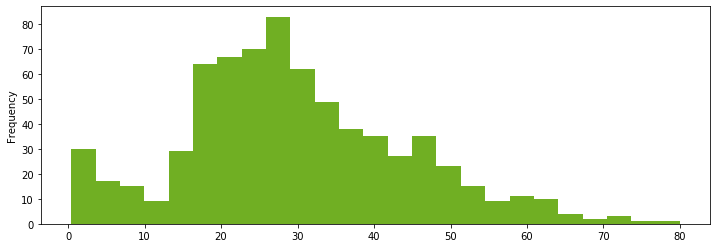

In [16]:
df['Age'].plot(kind='hist', bins=25, figsize=(12, 4), color='#70af23');

Now the same feature 'Age' grouped by passenger class and overlaid in a single visualization

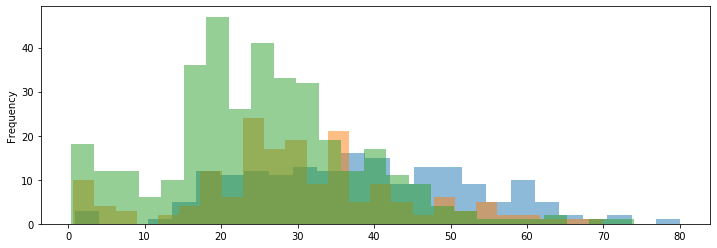

In [17]:
df[df['Pclass'] == 1]['Age'].plot(kind='hist',
                                  bins=25,
                                  figsize=(12, 4),
                                  alpha=0.5)
df[df['Pclass'] == 2]['Age'].plot(kind='hist',
                                  bins=25,
                                  figsize=(12, 4),
                                  alpha=0.5)
df[df['Pclass'] == 3]['Age'].plot(kind='hist',
                                  bins=25,
                                  figsize=(12, 4),
                                  alpha=0.5);

Remove the overlapping bars and convert to density plots

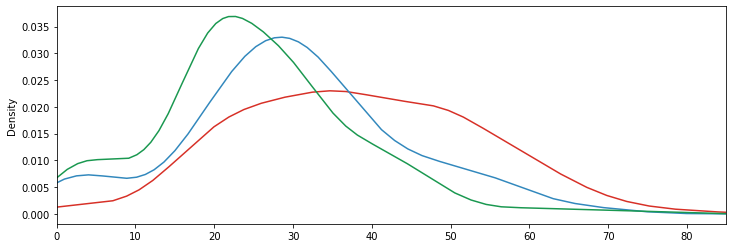

In [18]:
df[df['Pclass'] == 1]['Age'].plot(kind='density',
                                  figsize=(12, 4),
                                  xlim=(0, 85),
                                  color='#d73027')
df[df['Pclass'] == 2]['Age'].plot(kind='density',
                                  figsize=(12, 4),
                                  xlim=(0, 85),
                                  color='#3288bd')
df[df['Pclass'] == 3]['Age'].plot(kind='density',
                                  figsize=(12, 4),
                                  xlim=(0, 85),
                                  color='#1a9850');

###Single categorical features

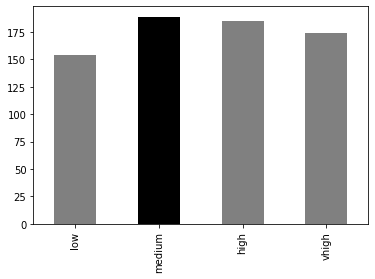

In [19]:
# Bar

most_tickets = df['fare_groups'].value_counts().sort_index().idxmax()
colors = ['black' if group == most_tickets else 'gray' for group in farelabel]
df['fare_groups'].value_counts().sort_index().plot(kind='bar', color=colors);

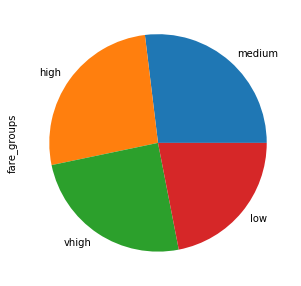

In [20]:
# Pie

df['fare_groups'].value_counts().plot(kind='pie', figsize=(5,5));

###Compare two categorical features

In [0]:
cab_survive = pd.crosstab(df['cabin_class'], df['Survived'])

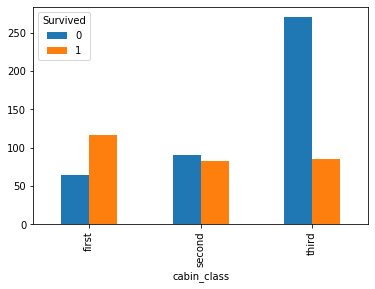

In [22]:
# As bar
cab_survive.plot(kind='bar');

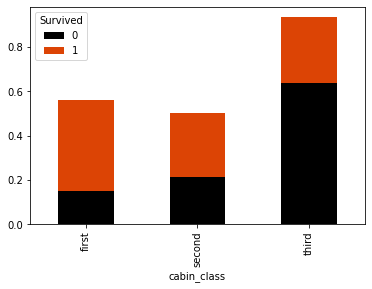

In [23]:
# As stacked bar

cab_survive_norm = pd.crosstab(df['cabin_class'], df['Survived'], normalize='columns')
cab_survive_norm.plot(kind='bar', stacked=True, color=['#000000', '#DC4405']);

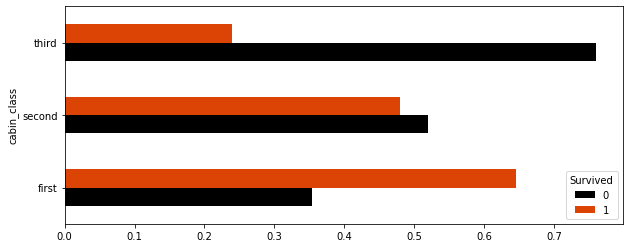

In [24]:
# Paired by percentage

cab_survive_pct = pd.crosstab(df['cabin_class'],
                              df['Survived'],
                              normalize='index')
cab_survive_pct.plot(kind='barh',
                     color=['#000000', '#DC4405'],
                     figsize=(10, 4));

###Compare continuous to categorical

In [25]:
df['Age'].mean()

29.618011283497882

In [26]:
cabbage = df.groupby('cabin_class')['Age'].mean()
cabbage

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

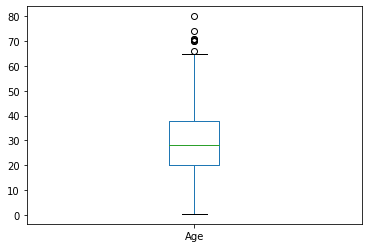

In [27]:
df['Age'].plot(kind='box');

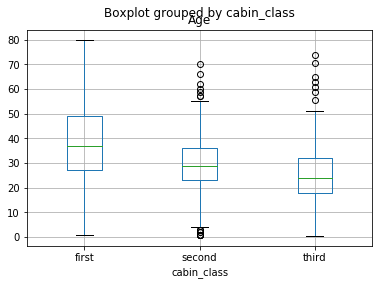

In [28]:
# Split by class
df.boxplot(column='Age', by='cabin_class');

###Comparing 2-3 continuous features

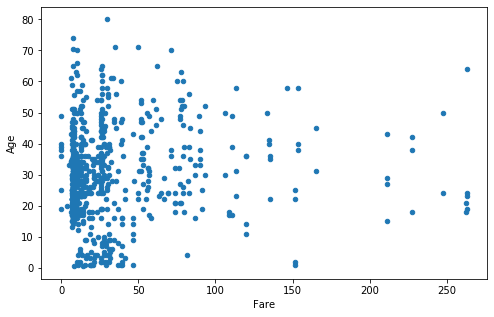

In [29]:
# 2 vars

df.plot(kind='scatter', x='Fare', y='Age', figsize=(8,5));

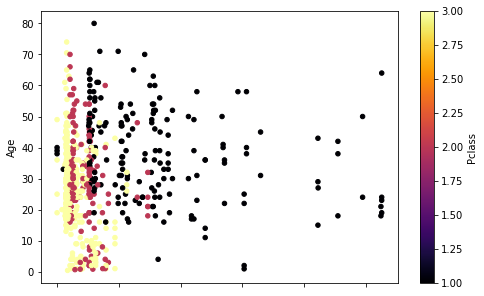

In [30]:
# 3 vars, adding passenger class to the above

df.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='inferno', figsize=(8,5));

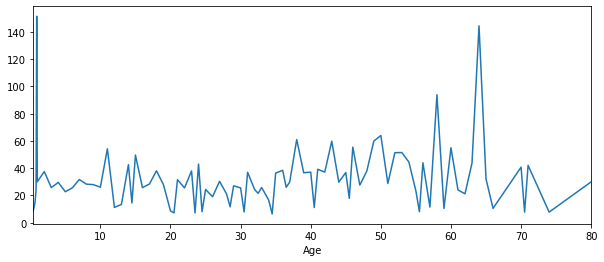

In [31]:
# Via line chart

df.groupby('Age')['Fare'].mean().plot(kind='line', figsize=(10,4));

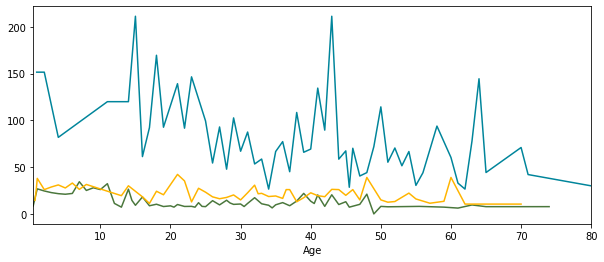

In [32]:
# Multiline

colors = ['#4A773C', '#00859B', '#FFB500']
for i, pclass in enumerate(df['Pclass'].unique()):
  (df[df['Pclass'] == pclass].groupby('Age')['Fare']
                             .mean()
                             .plot(figsize=(10, 4), color=colors[i]));

In [0]:
# Correlation via heatmap

In [34]:
corr_matrix = df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


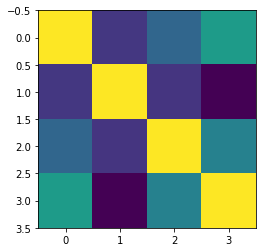

In [35]:
plt.imshow(corr_matrix);

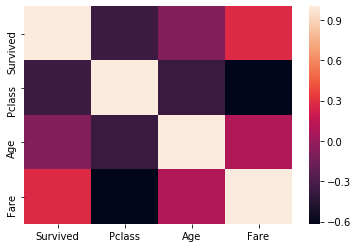

In [36]:
# Better heatmap via Seaborn

import seaborn as sns
sns.heatmap(corr_matrix);

# `matplotlib`

##Basic plots

In [0]:
x = np.linspace(0, 5, 11)
y = x ** 2

In [38]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [39]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

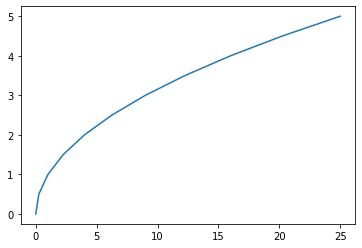

In [40]:
# Simple plot

plt.plot(y, x);

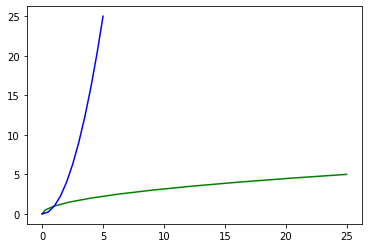

In [41]:
# With inverse

plt.plot(y, x, 'g')
plt.plot(x, y, 'b');

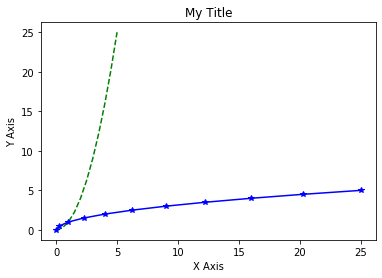

In [42]:
# With labels and texture

plt.plot(x, y, 'g--')
plt.plot(y, x, 'b*-')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('My Title');

## Multiple plots on one canvas

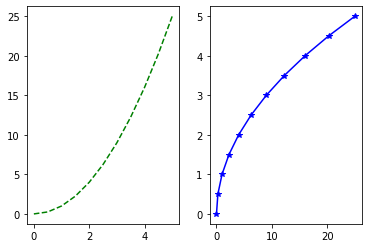

In [43]:
plt.subplot(1, 2, 1)
plt.plot(x, y, 'g--')

plt.subplot(1, 2, 2)
plt. plot(y, x, 'b*-');

##Object-oriented plotting

`.figure()` method

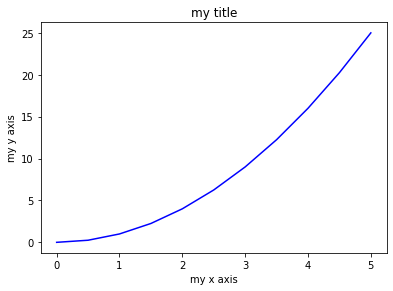

In [44]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(x, y, 'b')
axes.set_xlabel('my x axis')
axes.set_ylabel('my y axis')
axes.set_title('my title');

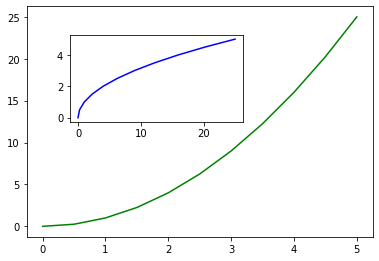

In [45]:
# Nested plots

fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])

axes1.plot(x, y, 'g')
axes2.plot(y, x, 'b');

`subplots()` method

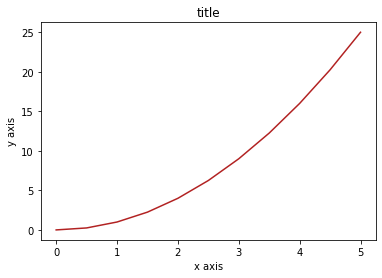

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=1)

axes.plot(x, y, 'firebrick')
axes.set_xlabel('x axis')
axes.set_ylabel('y axis')
axes.set_title('title');

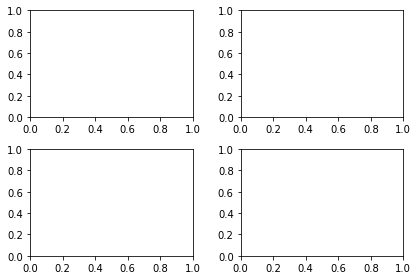

In [47]:
# Multiple plots sibe-by-side
fig, axes = plt.subplots(nrows=2, ncols=2)

plt.tight_layout();


In [48]:
# Taking a look at the axes array
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f554ce6d278>,
      dtype=object)

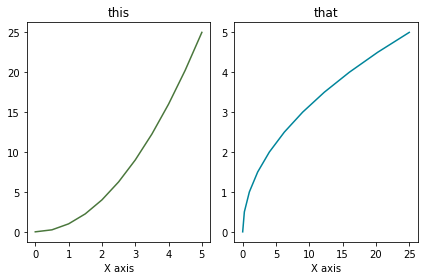

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plotvars = x, y
plottitles= 'this', 'that'
for i, ax in enumerate(axes):
  ax.plot(plotvars[-i], plotvars[1-i], colors[i])
  ax.set_xlabel('X axis')
  ax.set_title(plottitles[-i])
plt.tight_layout();

## Changing apect ratio, figure size and DPI

In [50]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

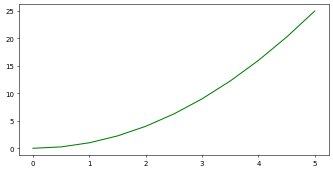

In [51]:
fig, axes = plt.subplots(figsize=(8,4), dpi=50)
axes.plot(x, y , 'g');

## Saving figures

In [0]:
fig.savefig('filename.png')

In [0]:
fig.savefig('filename.png', dpi=200)

##Legends

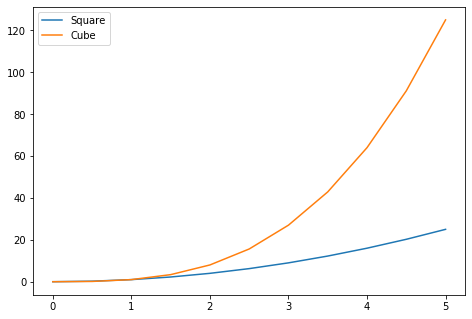

In [54]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, x ** 2, label='Square')
ax.plot(x, x ** 3, label='Cube')
ax.legend();

In [0]:
# Moving the legend around

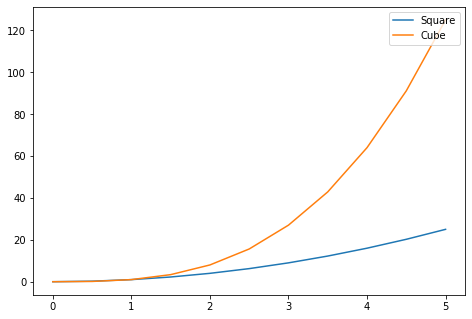

In [56]:
ax.legend(loc=1)
fig

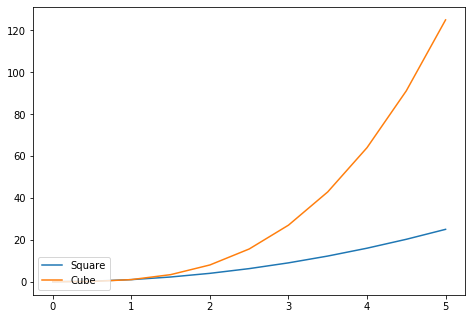

In [57]:
ax.legend(loc=3)
fig

##Colors, linewidths, linetypes

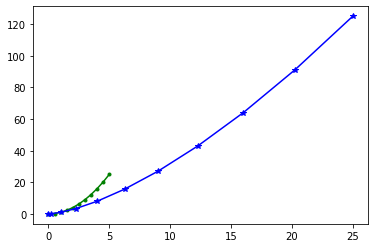

In [58]:
fig, ax = plt.subplots()
# green line with dots
ax.plot(x, x ** 2, 'g.-')
# blue dashed line
ax.plot(y, x ** 3, 'b-*')

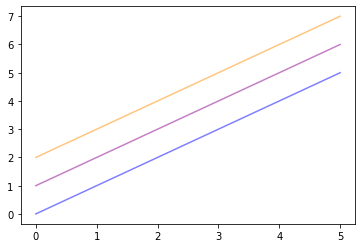

In [59]:
fig, ax = plt.subplots()
# half-transparant
ax.plot(x, x, color='blue', alpha=0.5)
# RGB hex code
ax.plot(x, x + 1, color='#8B008B', alpha=0.5)
# RGB hex code 
ax.plot(x, x + 2, color='#FF8C00', alpha=0.5);

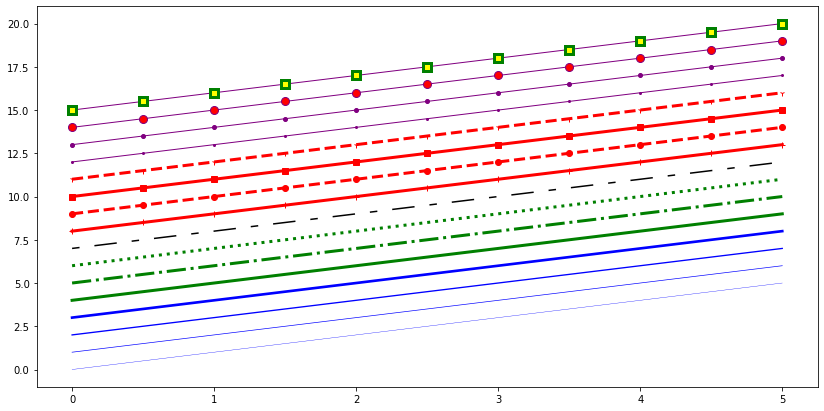

In [60]:
# Line widths and styles

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(x, x, color="blue", linewidth=0.33)
ax.plot(x, x + 1, color="blue", linewidth=0.66)
ax.plot(x, x + 2, color="blue", linewidth=1.33)
ax.plot(x, x + 3, color="blue", linewidth=2.66)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x + 4, color="green", lw=3, linestyle='-')
ax.plot(x, x + 5, color="green", lw=3, ls='-.')
ax.plot(x, x + 6, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x + 7, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10])

ax.plot(x, x + 8, color="red", lw=3, ls='-', marker='+')
ax.plot(x, x + 9, color="red", lw=3, ls='--', marker='o')
ax.plot(x, x + 10, color="red", lw=3, ls='-', marker='s')
ax.plot(x, x + 11, color="red", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x + 12, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x + 13, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x + 14, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x + 15, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

## Axis Appearance

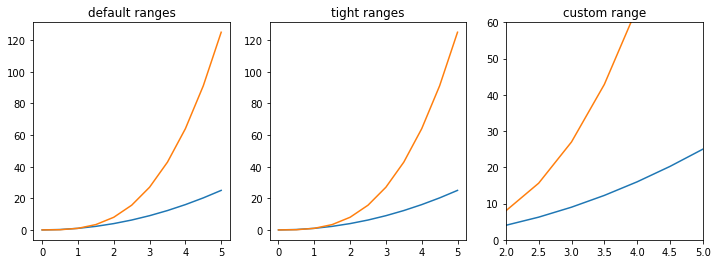

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x ** 2, x, x ** 3)
axes[0].set_title("default ranges")

axes[1].plot(x, x ** 2, x, x ** 3)
axes[1].axis('tight')
axes[1].set_title("tight ranges")

axes[2].plot(x, x ** 2, x, x ** 3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom range");

#Real-world recreations

Downloading and displaying the example plot

In [62]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

###Via fake mock-ups

In [63]:
plt.style.available

['tableau-colorblind10',
 'seaborn-muted',
 'seaborn',
 'dark_background',
 'grayscale',
 'seaborn-paper',
 'seaborn-ticks',
 'classic',
 'seaborn-white',
 'seaborn-bright',
 '_classic_test',
 'seaborn-pastel',
 'seaborn-poster',
 'bmh',
 'seaborn-darkgrid',
 'seaborn-notebook',
 'seaborn-dark',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'seaborn-deep',
 'Solarize_Light2',
 'fast',
 'seaborn-colorblind',
 'seaborn-talk',
 'ggplot',
 'seaborn-whitegrid']

In [0]:
plt.style.use('fivethirtyeight')
estimate_list = [38, 3, 2, 1, 2, 4, 6, 5, 5, 33]
estimate = pd.Series(estimate_list, index=range(1, 11))

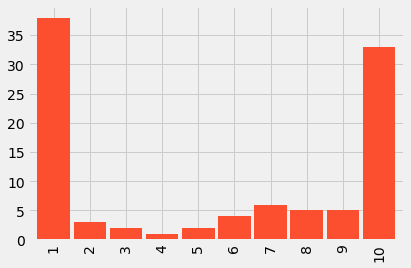

In [65]:
estimate.plot(kind='bar', color='C1', width=0.9);

In [0]:
est_lst = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [0]:
est_2 = pd.Series(est_lst)

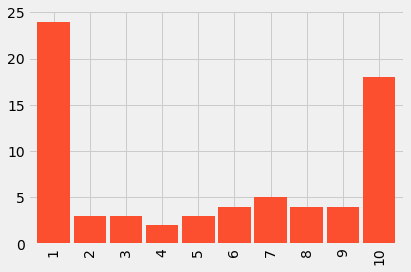

In [68]:
est_2.value_counts().sort_index().plot(kind='bar', color='C1', width=0.9);

Adding annotations

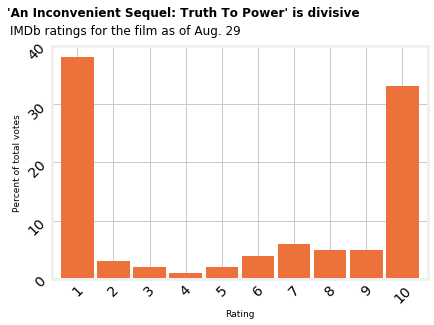

In [69]:
fig, ax = plt.subplots()
fig.patch.set(facecolor="white")

estimate.plot.bar(width=0.9, color="#ED713A")

ax.set(facecolor="white")

ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42);

ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

ax.set_xticklabels(range(1,11), rotation=45)
ax.set_yticklabels(range(0,50,10), rotation=45)
ax.set_yticks(range(0,50,10));

In [70]:
display(example)

###From real data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [72]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
# Reindex by timestamp _without_ using inplace!

df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')

In [74]:
df.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
lastday = df['2017-08-29']
lastday_filtered = lastday[lastday['category'] == 'IMDb users']

In [76]:
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [77]:
# Selecting the final row of the last day
final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [78]:
# Narrowing down to the pct columns
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [79]:
# Finally, trimming the table down to votes and pct of counts
plot_data = final[pct_columns].T
plot_data.index=range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


Figure from the lecture code:

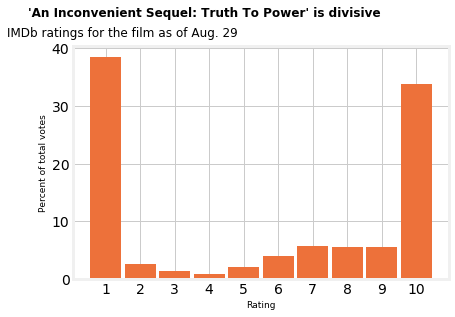

In [80]:
fig, ax = plt.subplots()

# Figure background color
fig.patch.set(facecolor="white")

# Set the bars
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color="#ED713A")

# Axes background color
ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42)

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

Example:

In [81]:
display(example)

My figure:

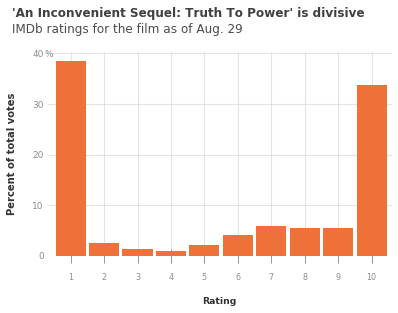

In [82]:
fig, ax = plt.subplots(figsize=(5.5,3.5))

fig.patch.set(facecolor="white")

# Set the bars
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color="#EE713A")

# Axes background color
ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.41, 
             y=1.14,
             fontweight='bold', alpha=.75)
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-.74, y=44, alpha=.7)
ax.text(s="%", fontsize=9, x=.23, y=39.3, alpha=.45)
# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9.2, weight='bold', labelpad=15, alpha=.8)
ax.set_ylabel("Percent of total votes", fontsize=10, weight='bold', labelpad=15, alpha=.8)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0, size=8, weight=10, alpha=.45)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10), size=9, alpha=.45)
ax.set_yticks(range(0,50,10))
ax.tick_params(axis='x', color='gray', length=14, direction='inout', pad=10);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlim(0.3,10.6)
ax.grid(True, 'major', 'both', color='lightgray', lw=1.1, alpha=.6)

In [93]:
display(example)

### Another Plot

In [84]:
url = 'https://fivethirtyeight.com/wp-content/uploads/2014/05/hickey-datalab-steak.png?w=575'
example_2 = Image(url=url, width=400)
display(example_2)

In [0]:
col_heads = ['ID', 'lotto', 'smoke', 'drink', 'gamble', 'skydive', 'speed', 'cheat', 'steak_yn', 'steak_prep', 'gender', 'age', 'income', 'edu', 'loc']

In [0]:
steak_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/steak-survey/steak-risk-survey.csv'
steak = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/steak-survey/steak-risk-survey.csv', header=None, names=col_heads, skiprows=2)

In [106]:
steak.head()

,ID,lotto,smoke,drink,gamble,skydive,speed,cheat,steak_yn,steak_prep,gender,age,income,edu,loc
0,3237565956,Lottery B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3234982343,Lottery A,No,Yes,No,No,No,No,Yes,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
2,3234973379,Lottery A,No,Yes,Yes,No,Yes,Yes,Yes,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic
3,3234972383,Lottery B,Yes,Yes,Yes,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England
4,3234958833,Lottery B,No,Yes,No,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Graduate degree,Middle Atlantic


In [114]:
steak['steak_prep'].value_counts()

Medium rare    166
Medium         132
Medium Well     75
Well            36
Rare            23
Name: steak_prep, dtype: int64

In [111]:
steak['steak_prep'].value_counts().sum()

432

So far so good - the total number of respondents matches that in the example image.

In [0]:
steak_data = steak['steak_prep'].value_counts(normalize=True).to_frame()

In [145]:
steak_data.columns = ['pct']
steak_data

,pct
Medium rare,0.384259
Medium,0.305556
Medium Well,0.173611
Well,0.083333
Rare,0.053241


In [146]:
steak_data.reindex(['Well', 'Medium Well', 'Medium', 'Medium rare', 'Rare'])

,pct
Well,0.083333
Medium Well,0.173611
Medium,0.305556
Medium rare,0.384259
Rare,0.053241


In [0]:
steak_data = steak_data.rename(index={'Medium Well': 'Medium-well', 'Medium rare': 'Medium-rare'})

In [0]:
steak_data = steak_data.reindex(['Rare', 'Medium-rare', 'Medium', 'Medium-well', 'Well'])

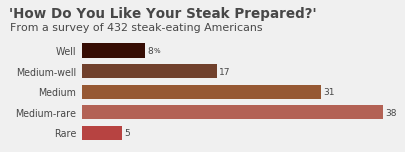

In [349]:
fig, ax = plt.subplots(figsize=(5.08,1.82))
g1 = ax.barh(y=list(steak_data.index), 
        width=steak_data['pct'], 
        height=0.7, 
        color=['#B74341','#B36255','#965833','#70402C','#360D04'])
ax.set_title("'How Do You Like Your Steak Prepared?'", 
             fontsize=13.5, 
             x=.26, 
             y=1.14,
             fontweight='bold', alpha=.70)
ax.text(s='From a survey of 432 steak-eating Americans', fontsize=11, x=-.088, y=5, alpha=.7)
ax.text(s="%", fontsize=7, x=.094, y=3.9, alpha=.8)
ax.set_yticklabels(list(steak_data.index), size=9.5, alpha=.7)
ax.set_xticklabels([])
for i, item in enumerate(g1):
  ax.text(s=int(round(item.get_width(),2)*100), x=item.get_width()+.003, y=i-.15, size=9, alpha=.7)
ax.grid(False)
ax.set_ylabel('.', labelpad=-10, alpha=0);

In [179]:
display(example_2)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [226]:
!apt install proj-bin libproj-dev libgeos-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev proj-bin
0 upgraded, 3 newly installed, 0 to remove and 7 not upgraded.
Need to get 305 kB of archives.
After this operation, 1,706 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 305 kB in 2s (141 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 135004 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.

In [227]:
!pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz

     |████████████████████████████████| 132.4MB 94kB/s 
     |████████████████████████████████| 10.1MB 2.6MB/s 
     |████████████████████████████████| 225kB 46.3MB/s 
  Created wheel for basemap: filename=basemap-1.1.0-cp36-cp36m-linux_x86_64.whl size=121632063 sha256=bf64b85ced6c831320e4742e7574d3bdfbf818e22ce18b14f1b2784a88f002f7
  Stored in directory: /tmp/pip-ephem-wheel-cache-zdxq6sj9/wheels/6c/c2/bd/d6fb8f2660e0591d357352aba1b117b3211d016994d933d792
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32607 sha256=8745b0ca140f2c4b58543f1c56b0dcf0832a14372f36e01b2ac69f1902bb2c31
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built basemap pyshp


In [0]:
import mpl_toolkits